In [2]:
import math
import numpy as np
import json
import random
import matplotlib.pyplot as plt
import copy

In [3]:
ERROR = 0.000000001
MAXIT = 500

In [4]:
def kmeans(dataset,k):
    centers = [] 
    centers = initialize(dataset["matrix"],k)
    for i in range(len(dataset["cluster"])):
        dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
    k = 0
    oldCenters = copy.deepcopy(centers)
    while(True):
        for i in range(len(centers)):
            newCenter = getCenter(getClusterPoints(dataset,i))
            if newCenter == None:
                centers[i] = [0]*len(centers[i])
                continue
            centers[i] = newCenter
        for i in range(len(dataset["cluster"])):
            dataset["cluster"][i] = getCluster(getPoint(dataset["matrix"],i),centers)
        k+=1
        if k > MAXIT:
            break
        elif (not change(centers,oldCenters)) and k > 0:
            break
        oldCenters = copy.deepcopy(centers)
    print(k)
    dataset["centers"] = centers
    return dataset

In [5]:
def initialize(dataset,k):
    leng = len(dataset[0])
    point = -1
    points = []
    centers = []
    for i in range(k):
        center = []
        while(point in points):
            point = random.randint(0,leng-1)
        points.append(point)
        for i in dataset:
            center.append(i[point])
        centers.append(center)
    return centers

In [6]:
def getCenter(clusterPoints):
    leng = len(clusterPoints)
    if leng == 0:
        return None
    summ = np.array(clusterPoints[0])
    for i in range(1,leng):
        summ += np.array(clusterPoints[i])
    newCenter = []
    for i in summ:
        newCenter.append(i/leng)
    return newCenter

In [6]:
a = [[0,0],[2,0],[2,2],[0,2]]
print(getCenter(a))

[1.0, 1.0]


In [8]:
def getList(dataset,feature):
    array = []
    for i in dataset:
        array.append(i[feature])
    return array

In [9]:
def getDistance(point1,point2):
    distance = np.linalg.norm(np.array(point1) - np.array(point2))
    return distance

In [10]:
def getPoint(matrix,index):
    point = []
    for i in matrix:
        point.append(i[index])
    return point

In [11]:
def change(centers,oldCenters):
    change = False
    for i in range(len(centers)):
        distance = getDistance(centers[i],oldCenters[i])
        if (distance > ERROR):
            change = True
            break
    return change

In [12]:
def getCluster(point,centers):
    minDis = getDistance(centers[0],point)
    minPos = 0
    for i in range(1,len(centers)):
        dis = getDistance(centers[i],point)
        if minDis > dis:
            minDis = dis
            minPos = i
    return minPos

In [13]:
def getClusterPoints(dataset,cluster):
    clusterPoints = []
    for i in range(len(dataset["matrix"][0])):
        if dataset["cluster"][i] == cluster:
            clusterPoints.append(getPoint(dataset["matrix"],i))
    return clusterPoints

In [14]:
def getDataset(dataset):
    cleanDataset = {
        "matrix" : [],
        "cluster": [],
    }
    for i in dataset[0]:
        if i != "cluster":
            cleanDataset["matrix"].append(getList(dataset,i))
        elif i == "cluster":
            cleanDataset["cluster"] = getList(dataset,"cluster")
    return cleanDataset

In [15]:
def normalize(array):
    norm = np.linalg.norm(np.array(array))
    for i in range(len(array)):
        array[i] = array[i]/norm
    return array

In [16]:
def getObjectiveFunction(k,centers,dataset):
    J = 0
    for i in range(k):
        clusterPoints = getClusterPoints(dataset,i)
        for t in clusterPoints:
            J += math.pow(getDistance(t,centers[i]),2)
    return J

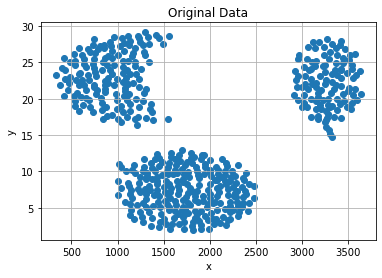

In [17]:
exist = True
try:
    f = open("../data/teacherData.json","r")
    stringSet = f.read()
    f.close()
except:
    print("Arquivo não existe")
    exist = False
if(exist):
    dataset = json.loads(stringSet)
    nDataset = getDataset(dataset)
    plt.scatter(nDataset["matrix"][0],nDataset["matrix"][1])
    plt.title("Original Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig("../images/originalData1.png")
    for i in range(len(nDataset["matrix"])):
        nDataset["matrix"][i] = normalize(nDataset["matrix"][i])

In [18]:
def elbow(dataset,path):
    ks = []
    Js = []
    for k in range(1,11):
        nDataset = kmeans(dataset,k)
        Js.append(getObjectiveFunction(3,dataset["centers"],dataset))
        ks.append(k)
        dataset["cluster"] = [-1]*len(dataset["matrix"][0])
    plt.plot(ks,Js,marker = "o")
    plt.title("Elbow Method")
    plt.xlabel("k")
    plt.ylabel("Objective Function")
    plt.grid(True)
    plt.savefig(path) 

In [24]:
def printKmeans(dataset,k,path,printable):
    #print(getList(dataset,"cluster"))
    dataset["cluster"] = [-1]*len(dataset["matrix"][0])
    dataset = kmeans(nDataset,k)
    printable(dataset,path)

In [20]:
def print2d(dataset,path):
    plt.scatter(dataset["matrix"][0],dataset["matrix"][1],c = dataset["cluster"])
    plt.title("clustered Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.savefig(path) 

2
2
4
6
13
10
12
17
10
13


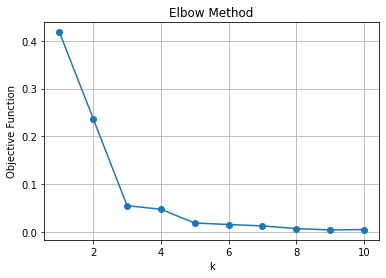

In [22]:
elbow(nDataset,"../images/Elbow1.png")

5


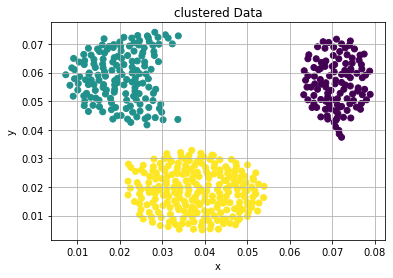

In [25]:
printKmeans(nDataset,3,"../images/clusteredData1.png",print2d)

In [ ]:
clusterCount = [0]*3
for i in range(5):
    clusterCount[i] = len(getClusterPoints(dataset,i))
    plt.bar([0,1,2,3,4],clusterCount)
    plt.title("Clusters length")
    plt.xlabel("Cluster")
    plt.ylabel("Number of elements in cluster")
    plt.grid(True)

    plt.savefig("clusterLength.png")